In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Bias and Variance in Polynomial Fitting

For this exercise we consider training data sampled as follow:
$$x\sim {\rm Unif}([0, 2]),\quad \varepsilon \sim \mathcal N(0, \sigma^2)$$
$$y = f_\star(x) + \epsilon = {\rm sin}(2\pi x) + \epsilon$$

1.1) Define a function that samples $n$ data points $\mathcal D =\{(x_i, y_i)\}_{i=1}^n$ and return the arrays $[x_1, ..., x_n]$ and $[y_1, ..., y_n]$.

In [ ]:
def true_function(x):
  return np.sin(2*np.pi*x)

def sample_data(size, noise_var = 0.1):
  ####

We are going to fit the data with a polynomial of $x$ of degree $k$, *i.e.* by computing coefficients $\beta_0, \beta_1, ..., \beta_k$ such that the estimator is $\hat y (x) = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_k x^k$.

Can you think of a simple way to do it in practice?

1.2) Define a function that takes as input the training data and label arrays, perform polynomial fitting (degree $k$) and returns the fitted model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
def poly_features(degree, X): #"fit" PolynomialFeatures to data
  poly = PolynomialFeatures(degree)
  ####
  return poly
def poly_fit(X, y, poly): #fit of polynomial features
  X_poly = ####
  model = ####
  model.fit(X_poly, y)
  return model

Expected risk:
$$R_{test}(\hat y) = \mathbb E_{x, y, \mathcal D}[(y - \hat y (x))^2] = \sigma^2 + {\rm Bias}^2(\hat y) + {\rm Variance}(\hat y),$$
where
$${\rm Bias}^2(\hat y) = \mathbb E_{x}[\mathbb E_{\mathcal D}[(\hat y(x)] - f_\star(x))^2] $$
and
$${\rm Variance}(\hat y) = \mathbb E_{x,\mathcal D}[(\hat y(x) - \mathbb E_{\mathcal D}[\hat y(x)])^2] = \mathbb E_x {\rm Var}_{\mathcal D}[\hat y(x)].$$

The aim of this exercise is to compute the (empirical) bias and variance for our model and observe how they depend on the degree $k$.

1.3) Define a function that computes empirically bias and variance, given the polynomial degree $k$, returning their average and standard deviation.

*Suggestions:*


*   sample $N$ datasets $\mathcal D_1, ..., \mathcal D_N$ of training data
*   for each training dataset $\mathcal D_j$, fit the model and obtain the correspondent estimator $\hat y_j(x)$ (use the function you have defined before)
*   for each training dataset, consider the same set of test data, which can be used to compute "$\mathbb E_x$".



In [ ]:
def compute_bias_variance(train_size, test_size, degree = 1, seeds = 100, noise_var = 0.1):
    ####

1.4) Consider $n = 100$, $\sigma^2 = 0.5$, $N = 500$ and $n_{test} = 300$. Compute bias and variance for $k = 1, ..., 12$ and plot them, as a function of the polynomial degree, together with the test risk.

In [ ]:
n = 100
noise_var = 0.5
N = 500
n_test = 300
max_degree = 12
degrees = np.arange(1,max_degree + 1)

####

Text(0.5, 1.0, 'Bias vs Variance')

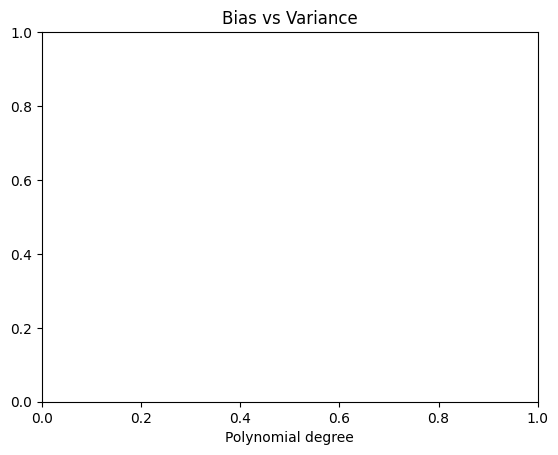

In [ ]:
####

plt.xlabel('Polynomial degree')
plt.title('Bias vs Variance')

1.5) Consider now a smaller training dataset, $n = 20$, $\sigma^2 = 0.1$, and train the model for $k = 1, 6, 10, 15$. Plot the data points and the model predictions over a grid on $[0, 2]$.

*Suggestion:* use `plt.ylim()` to set the limits for the $y$-axis in your plot.

Text(0, 0.5, 'y')

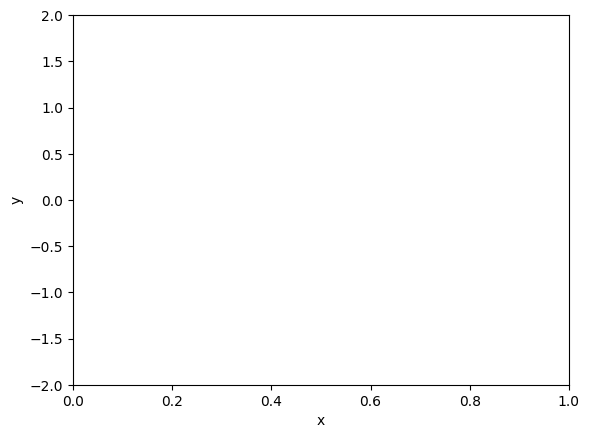

In [ ]:
#X_train, y_train = ####
grid = np.linspace(0, 2, 200)
degrees_2 = [1, 6, 10, 15]


####

plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')

# 2. Robustness under data corruption

The purpose of this exercise is to compare the performances of different estimators in presence of data corruption.

We are going to consider a basic example. Consider $n$ i.i.d. random variables $X_1, ..., X_n$. "Ideally" $X_i\sim\mathcal N_{\rm std}$, but in practice we will have access to a dataset where some of the data points may be corrupted.

The aim is to estimate $\mathbb E[X]$, by computing $$\hat\mu_\ell \in \arg\min_{\hat \mu\in\mathbb R}\sum_{i=1}^n\ell(X_i, \hat \mu),$$
for a given loss function $\ell(\cdot,\cdot)$. In particular we are going to consider the estimators obtained with the square loss ($\hat\mu_2$), the absolute loss ($\hat\mu_1$) and the Huber loss ($\hat\mu_H$).

Do you remember what $\hat \mu_1$ and $\hat \mu_2$ represent?

In [ ]:
from sklearn.linear_model import HuberRegressor

#This is one way to compute the Huber estimator
def huber_estimator(x, delta):
  hub = HuberRegressor(epsilon = delta, fit_intercept=False)
  ones = np.ones((x.shape[0],1))
  huber = hub.fit(ones, x)
  return huber.coef_[0]

## Additive corruption: outliers

In this example, a fraction $\epsilon$ of data points is drawn from a separate source polluting the sample. We are going to consider the following case
$$X_i\sim_{\rm i.i.d.} (1 - ϵ)\mathcal N_{\rm std} + ϵ\;\mathcal N(\mu, \sigma^2).$$

2.1) Define a function that samples this type of corrupted dataset. Choose $n = 1000$, $\mu = 1$ and $\sigma^2 = 10$. For $\epsilon$ ranging from 0 to 0.3, sample $N = 20$ datasets and, for each of them, compute $\hat\mu_2$, $\hat\mu_1$ and $\hat\mu_H$ (you may set the Huber parameter $\delta = 1.1$). Plot the average of each estimator (*optional: with errorbars*) as a function of the corruption level $\epsilon$.

In [ ]:
def sample_additve_corrupted(n, epsilon, mu = 1, noise_var_out = 10):
  ####
  return x

In [ ]:
# optional: visualize an example of sample (histogram): e.g. n = 500, epsilon = 0.1

In [ ]:
n = 1000
l = 20
corruption_levels = np.linspace(0, 0.3, l)
N = 20



Text(0, 0.5, 'Estimator')

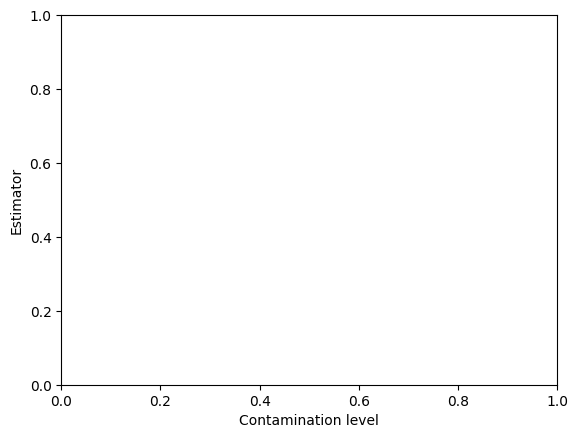

In [ ]:
###
plt.xlabel('Contamination level')
plt.ylabel('Estimator')

## Capped measurements

In this second example we consider the case of "saturation" of the data value at a threshold $T$. Let's consider, for instance, an uncorrupted sample $\{\tilde X_i\}_{i=1}^n$, then the corrupted sample may be constructed as
$$X_i = \min\{\tilde X_i, T\},\text{ for } i = 1, ..., n$$

2.2) Repeat the previous exercise, considering this example of corruption, for $T$ ranging from 1 to 3.

In [ ]:
def sample_saturation_corrupted(n, T):
  ####
  return ####

In [ ]:
####

In [ ]:
n = 1000
l = 50
threshold_levels = np.linspace(0, 3, l)
N = 50

####

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Estimator')

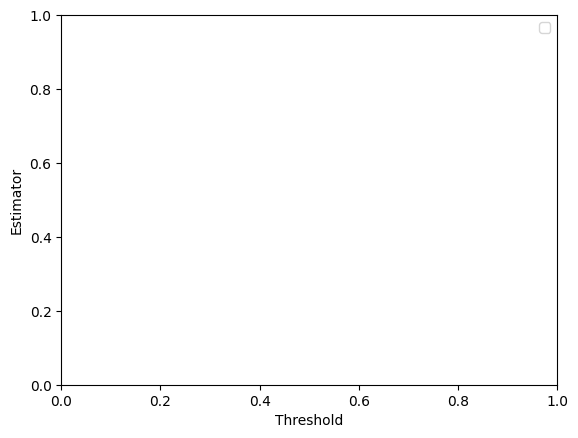

In [ ]:
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Estimator')

2.3) You may repeat the exercise with differend kinds of corruptions. For instance: consider a dataset sampled from the uncorrupted distribution and, if a data point is below a threshold $T$, you remove it from the sample with probability $\epsilon$ and keep it with probability $1 - \epsilon$.

Moreover, consider the first example (outliers), with variance of the contaminating distribution smaller than 1: is the median still robust? Can you explain why?

# 3. k-fold Cross-Validation Risk vs Population Risk

In this exercise, we consider the following classification problem: dataset $\{(x_i, y_i)\}_{i=1}^n$ i.i.d., where
$$y_i = \operatorname{sign}(\langle x_i, \theta \rangle + \eta_i)$$
with $x_i\sim\mathcal N(0, \mathbb I_d)$ and $\eta_i\sim\mathcal N(\mu, \sigma^2)$.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define a function that samples the dataset, given theta

def sample_classification(n, d, theta, noise_var = 1, noise_mean = 0.25):
  X = np.random.randn(n, d) + 0.25
  noise = np.random.randn(n)*np.sqrt(noise_var) + noise_mean
  y = np.sign(X.dot(theta) + noise)
  return X, y

In [ ]:
# Define a function that fits a Logistic Regression models
# Note: logistic regression allows to weight each class, you can control this feature through the parameter w:
#       this is useful when the number of data in each class is unbalanced

def fit_LogisticRegression(X, y, w = 1):
  LR = LogisticRegression(class_weight={-1 : 1, 1 : w})
  LR.fit(X, y)
  return LR

# Define a function that estimated the population risk, given a fitted model

def compute_population_risk(n_test, d, theta, fitted_model, noise_var = 1, noise_mean = 0.25):
  X_test, y_test = sample_classification(n_test, d, theta, noise_var = noise_var, noise_mean = noise_mean)
  return 1 - fitted_model.score(X_test, y_test)


3.1) Fit the Logistic Regression model on a training dataset and estimate the population risk, as a function of the weight $w$. Plot the results.

In [ ]:
w_array = np.linspace(0.5, 2.5, 100)
n_sample = 1000
dim = 100
theta = np.random.randn(dim) / np.sqrt(dim)
noise_mean = 1
noise_var = 1

####

Text(0, 0.5, 'Population risk')

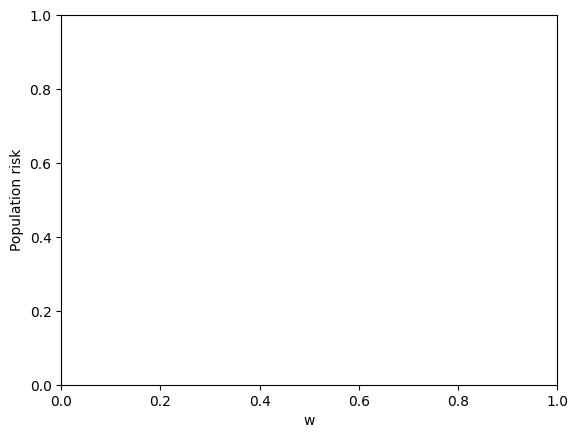

In [ ]:
###
plt.xlabel('w')
plt.ylabel('Population risk')

It is not always possible to use a large amount of data to estimate the population risk. A common practice is to compute the cross-validation risk as an approximation of the population one.

3.2) Compute the K-fold cross-validation risk for $K = 2, 3, 15$, as a function of $w$. Plot the results, together with the population risk.

In [ ]:
def compute_cv_risk(X, y, splits = 3, w = 1):
  LR = LogisticRegression(class_weight={-1:1, 1:w})
  cv_scores = cross_val_score(LR, X, y, cv=splits, scoring='accuracy')
  cv_risk = 1 - np.mean(cv_scores) # This corresponds to the 0-1 loss
  return cv_risk

In [ ]:
splits_values = np.array([2, 3, 15])
####

Text(0, 0.5, 'Risk')

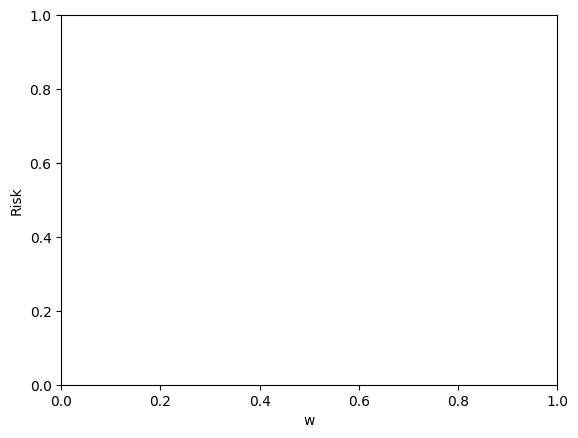

In [ ]:
###

plt.xlabel('w')
plt.ylabel('Risk')